In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error , mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


In [2]:
print (f"Numpy version:{np.__version__}")
print (f"Pandas version:{pd.__version__}")


Numpy version:1.23.2
Pandas version:1.4.3


In [3]:
def get_data_separated(dataframe, test_size=0.2, random_state=None):
    target_feature = ['ΔVC -p'] #+ ΔVC-m,ΔVC -p
    features_to_drop = ['substituent','molecular_formula','Name','canonical_smiles','ΔVC-m','cid']

    # Assuming 'target_feature' is the dependent variable (y)
    y = dataframe[target_feature]
    X = dataframe.drop(columns=features_to_drop + target_feature)
    X =X.fillna(0)

    # Split into training and testing sets, excluding data_val
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    # create the next sets , you split the temp data into halfs 
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=random_state
    )

    return X_train, X_val, X_test, y_train, y_val, y_test


In [4]:
def scaling_data(X_train,X_val,X_test):

    scaler = StandardScaler()

    scaler.fit(X_train)
    
    # filename = '../models/scaler_for_all_features.sav'
    # pickle.dump(scaler, open(filename, 'wb'))
    
    scaled_train = scaler.transform(X_train)
    scaled_test = scaler.transform(X_test)
    scaled_val = scaler.transform(X_val)
    return scaled_train,scaled_val,scaled_test

In [5]:
def save_metrics_results(model,X_test,y_test,tag):

    y_pred = model.predict(X_test)
    r2 = r2_score(y_pred=y_pred,y_true=y_test)
    MAE = mean_absolute_error(y_pred=y_pred,y_true=y_test) 
    MSE = mean_squared_error(y_pred=y_pred,y_true=y_test) 
    MAPE = mean_absolute_percentage_error(y_pred=y_pred,y_true=y_test)
    MedAE = median_absolute_error(y_pred=y_pred,y_true=y_test)
    # MSLE = mean_squared_log_error(y_pred=y_pred,y_true=y_test)

    results = {
        "R^2": r2,
        "MAE":MAE,
        "MSE":MSE,
        "MAPE":MAPE ,
        "MedAE":MedAE,
        # "MSLE":MSLE
    }
    mean_df = pd.DataFrame(data=results,index=[f"{tag}"])
    return mean_df

In [6]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor, ARDRegression, OrthogonalMatchingPursuit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

def load_regression_models():
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'Elastic Net': ElasticNet(),
        'Bayesian Ridge': BayesianRidge(),
        'Huber Regressor': HuberRegressor(),
        'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
        'RANSAC Regressor': RANSACRegressor(),
        'ARD Regression': ARDRegression(),
        'Orthogonal Matching Pursuit': OrthogonalMatchingPursuit(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Support Vector Regression': SVR(),
        'Stochastic Gradient Descent': SGDRegressor(),
        'Multi-layer Perceptron': MLPRegressor()
    }
    return models




In [7]:
# Example usage:
regression_models = load_regression_models()
for name, model in regression_models.items():
    print(f"{name}: {model}")

Linear Regression: LinearRegression()
Ridge: Ridge()
Lasso: Lasso()
Elastic Net: ElasticNet()
Bayesian Ridge: BayesianRidge()
Huber Regressor: HuberRegressor()
Passive Aggressive Regressor: PassiveAggressiveRegressor()
RANSAC Regressor: RANSACRegressor()
ARD Regression: ARDRegression()
Orthogonal Matching Pursuit: OrthogonalMatchingPursuit()
Decision Tree: DecisionTreeRegressor()
Random Forest: RandomForestRegressor()
Gradient Boosting: GradientBoostingRegressor()
K-Nearest Neighbors: KNeighborsRegressor()
Support Vector Regression: SVR()
Stochastic Gradient Descent: SGDRegressor()
Multi-layer Perceptron: MLPRegressor()


In [8]:
rng = np.random.RandomState(42)
# data loading 
path = '/Users/barradd/Documents/GitHub/machine_learning_chem_RGS/data/pubchem_data_2023-12-05_343_samples.csv'
df_all_data = pd.read_csv(path)


In [9]:
X_train, X_val, X_test, y_train, y_val, y_test = get_data_separated(df_all_data,random_state=rng)
X_train, X_val, X_test = scaling_data(X_train, X_val, X_test)

In [10]:
def plot_the_r2(y_true, X_pred , model): #(model,X_test,y_test,tag)
    y_true = y_true.to_numpy().ravel()
    y_pred = model.predict(X_pred)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, color='blue')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red')
    plt.title('Real Values vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plot Residuals
    residuals = y_true - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_true, residuals, color='green')
    plt.axhline(y=0, linestyle='--', color='red')
    plt.title('Residual Plot')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

* create a loop that goes over all the list of algoritms 
* then use the fit function to train them
* the next step is to save the metrics per model 
* check the evaluation and plot the models that you think is relevant

In [11]:
val_results_list = []
for name, model in regression_models.items():
    print (name)
    model.fit(X_train, y_train.to_numpy().ravel())
    val_results_list.append ( save_metrics_results(model=model,X_test=X_val,y_test=y_val,tag=name) ) 

Linear Regression
Ridge
Lasso
Elastic Net
Bayesian Ridge
Huber Regressor
Passive Aggressive Regressor
RANSAC Regressor


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


ARD Regression
Orthogonal Matching Pursuit
Decision Tree
Random Forest


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Gradient Boosting
K-Nearest Neighbors
Support Vector Regression
Stochastic Gradient Descent
Multi-layer Perceptron


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
val_results_df = pd.concat(val_results_list)

In [16]:
val_results_df.sort_values(by=["R^2", "MAE"],ascending=False)

,R^2,MAE,MSE,MAPE,MedAE
Multi-layer Perceptron,9.292701e-01,1.556827e+00,5.547179e+00,4.867317e-01,0.995507
Stochastic Gradient Descent,9.199809e-01,1.820737e+00,6.275711e+00,5.710497e-01,1.450462
Bayesian Ridge,9.175850e-01,1.828712e+00,6.463615e+00,5.721928e-01,1.544357
ARD Regression,9.141550e-01,1.905300e+00,6.732620e+00,5.886131e-01,1.452098
Ridge,9.138422e-01,1.878940e+00,6.757154e+00,5.775585e-01,1.453757
Linear Regression,9.109390e-01,1.883033e+00,6.984844e+00,5.716689e-01,1.222909
Huber Regressor,9.095674e-01,1.956546e+00,7.092416e+00,5.647116e-01,1.465605
Orthogonal Matching Pursuit,8.948925e-01,2.048143e+00,8.243337e+00,6.898424e-01,1.404916
Random Forest,8.941382e-01,1.610318e+00,8.302493e+00,3.600812e-01,0.606007
Gradient Boosting,8.894858e-01,1.725087e+00,8.667374e+00,4.468278e-01,0.808533


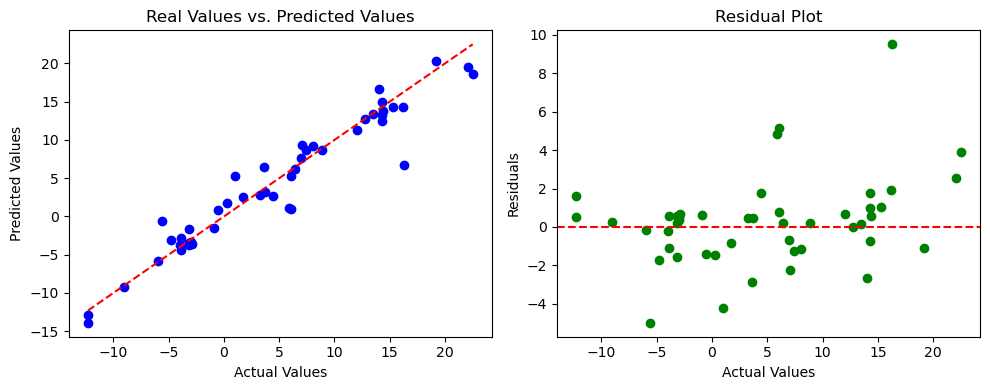

In [17]:
plot_the_r2(y_true=y_val, X_pred = X_val , model = regression_models["Multi-layer Perceptron"] )



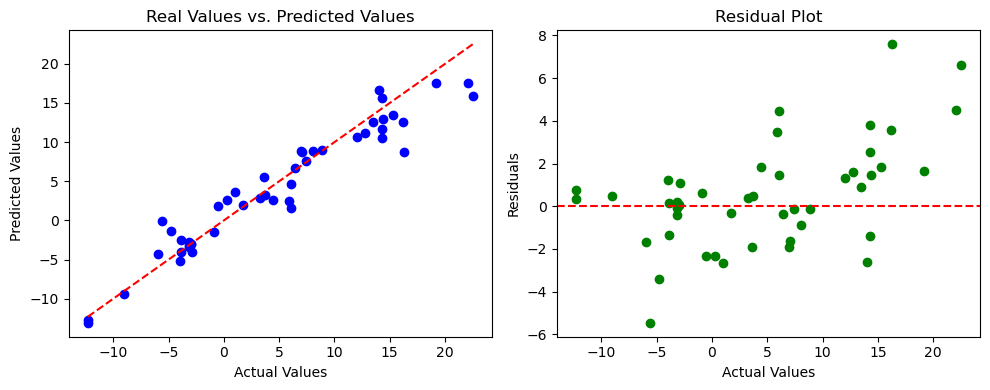

In [18]:
plot_the_r2( y_true=y_val, X_pred = X_val , model = regression_models["Stochastic Gradient Descent"]    )